<a href="https://colab.research.google.com/github/mbhuiyan1/Advanced-Machine-Learning/blob/main/market_basket_analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Market-Basket Analysis/retail_dataset.csv', sep=',') 
## Print first 10 rows 
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [ ]:
df.shape

(315, 7)

In [ ]:
records = []
for i in range(0, 315):
  records.append([str(df.values[i, j]) for j in range (0, 7)])
records

In [ ]:
#Let's encode the list
# from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(records).transform(records). # fit method works for unique items in the dataset
df = pd.DataFrame(a_data, columns=a.columns_)
df

In [ ]:
df = df.replace(False,0)
df = df.replace(True,1)
df

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine,nan
0,0,1,1,1,1,1,0,1,1,0
1,0,1,1,1,0,1,1,1,1,0
2,0,0,1,0,1,1,1,0,1,1
3,0,0,1,0,1,1,1,0,1,1
4,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,1,0,0,0,0,1
311,0,0,0,0,0,1,1,1,0,1
312,0,1,1,1,1,1,0,1,1,0
313,0,0,1,0,0,1,0,0,0,1


In [ ]:
df = df.drop(['nan'], axis=1)
df


,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,0,1,1,1,1,1,0,1,1
1,0,1,1,1,0,1,1,1,1
2,0,0,1,0,1,1,1,0,1
3,0,0,1,0,1,1,1,0,1
4,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,1,0,0,0,0
311,0,0,0,0,0,1,1,1,0
312,0,1,1,1,1,1,0,1,1
313,0,0,1,0,0,1,0,0,0


In [ ]:
df.sum() # checking the frequency of 1-itemset

Bagel     134
Bread     159
Cheese    158
Diaper    128
Eggs      138
Meat      150
Milk      158
Pencil    114
Wine      138
dtype: int64

In [ ]:
# Support of 1-itemset : frequency/total number of transaction
sup1 = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
sup1

,Support
Bread,0.504762
Cheese,0.501587
Milk,0.501587
Meat,0.476190
Eggs,0.438095
Wine,0.438095
Bagel,0.425397
Diaper,0.406349
Pencil,0.361905


In [ ]:
# Applying apriori function that evaluates support value for each possible frequent itemsets based on Minimum support.
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.279365,"(Bagel, Bread)"


In [ ]:
# Finding association rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
2,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
3,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
5,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
6,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
7,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
8,"(Eggs, Cheese)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773
9,"(Eggs, Meat)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667


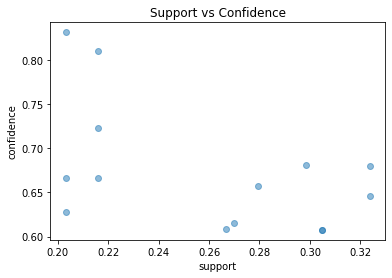

In [ ]:
# plot support vs. Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
